# Sync

In [2]:
!aws s3 sync resources/grn-benchmark s3://openproblems-data/resources/grn/grn-benchmark --delete
!aws s3 sync resources/grn_models/ s3://openproblems-data/resources/grn/grn_models --delete
!aws s3 sync resources/prior/ s3://openproblems-data/resources/grn/prior --delete
# !aws s3 sync resources/supplementary/ s3://openproblems-data/resources/grn/supplementary --delete
# !aws s3 sync resources/results/ s3://openproblems-data/resources/grn/results --delete

/bin/bash: aws: command not found
/bin/bash: aws: command not found
/bin/bash: aws: command not found


In [ ]:
!cp resources/prior resources_test/prior

In [2]:
# !aws s3 sync resources_test/ s3://openproblems-data/resources_test/grn/ --delete

In [3]:
!aws s3 sync s3://openproblems-data/resources/grn/grn-benchmark resources/grn-benchmark 
# !aws s3 sync  s3://openproblems-data/resources/grn/grn_models resources/grn_models/
# !aws s3 sync s3://openproblems-data/resources/grn/prior resources/prior/ 


/bin/bash: aws: command not found


# Import

In [2]:
%reload_ext autoreload
%autoreload 2
import yaml
import os
import pandas as pd
import anndata as ad 
import numpy as np
import scanpy as sc 
from src.exp_analysis.helper import plot_cumulative_density
import matplotlib.pyplot as plt
import sys 
import subprocess
import io
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sys.path.append('../')
from grn_benchmark.src.commons import surragate_names
from src.helper import *
par = {
    # 'methods': [ 'collectri', 'negative_control', 'positive_control', 'pearson_corr', 'portia', 'ppcor', 'genie3', 'grnboost2', 'scenic', 'scglue', 'celloracle'],
    'methods': [ 'collectri', 'negative_control', 'positive_control', 'pearson_corr', 'portia', 'ppcor', 'grnboost2', 'scenic', 'scglue', 'celloracle', 'scenicplus'],
    'models_dir': 'resources/grn_models/',
    'scores_dir': 'resources/scores'
}

# Prior 

In [18]:
if False: 
    create_skeleton() # create tf2gene putative links
if False: # check how predictions are included in the skeleton 
    all_links = 'path_2_skeleton'
    par['models_dir'] = 'resources/grn_models/d0_hvg'
    for method in ['scenicplus']:
        prediction = pd.read_csv(f"{par['models_dir']}/{method}.csv", index_col=0)
        prediction['link'] = prediction['source'].astype(str) + '_' + prediction['target'].astype(str)
        print(method, len(prediction), np.intersect1d(all_links, prediction['link']).shape)

# Run grn inference 

In [19]:
# # !sacct 
# 

sbatch: error: Unable to open file scripts/sbatch/ppcor.sh


In [23]:
if False: # local runs
    run_grn_inference()
if False: # r based methods
    !sbatch scripts/sbatch/ppcor.sh
if False: # seqera (celloracle) #TODO: add this to local 
    run_grn_inference_seqera()

# Calculate scores

In [3]:
if False: # consensus: run this after updating grns
    run_consensus(par)

if True: # run metrics/script_all.py
    calculate_scores()

Submitted batch job 7759699


In [13]:
df_scores = pd.read_csv(f"resources/scores/hvg/skeleton_False/scgen_pearson-ridge.csv", index_col=0)
df_all_n = (df_scores-df_scores.min(axis=0))/(df_scores.max(axis=0)-df_scores.min(axis=0))
df_scores['rank'] = df_all_n.mean(axis=1).rank(ascending=False).astype(int)
df_scores

,S1,S2,static-theta-0.0,static-theta-0.5,rank
scenicplus,0.245033,0.403494,0.760583,0.539209,4
collectri,-0.100238,-0.211182,0.485506,0.457259,11
negative_control,-0.039305,-0.041004,0.274659,0.440383,12
positive_control,0.197129,0.578822,0.872003,0.595489,2
pearson_corr,0.269379,0.509297,0.735156,0.517056,3
portia,0.148941,0.227248,0.473607,0.467607,9
ppcor,0.022846,0.094107,0.430776,0.449144,10
grnboost2,0.381032,0.459860,0.748175,0.615790,1
scenic,0.144696,0.206571,0.685034,0.556485,7
scglue,0.078309,0.238859,0.530531,0.483423,8


In [8]:
df_scores = pd.read_csv(f"resources/scores/full/skeleton_True/scgen_pearson-ridge.csv", index_col=0)
df_all_n = (df_scores-df_scores.min(axis=0))/(df_scores.max(axis=0)-df_scores.min(axis=0))
df_scores['rank'] = df_all_n.mean(axis=1).rank(ascending=False).astype(int)
df_scores.style.background_gradient()

,S1,S2,static-theta-0.0,static-theta-0.5,rank
collectri,-0.100238,-0.211182,0.485506,0.457259,11
negative_control,-0.044574,-0.045158,0.359805,0.438451,10
positive_control,0.197129,0.578822,0.872003,0.595489,2
pearson_corr,0.273443,0.516343,0.782978,0.538252,3
portia,0.263310,0.357006,0.566365,0.507570,6
ppcor,0.017954,0.159754,0.468049,0.454995,9
grnboost2,0.421936,0.489322,0.788931,0.629471,1
scenic,0.168006,0.218916,0.756965,0.565434,5
granie,0.083298,0.106012,0.194164,0.363425,12
scglue,0.080857,0.293630,0.660357,0.480734,7


(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='Weight', ylabel='Cumulative Density'>)

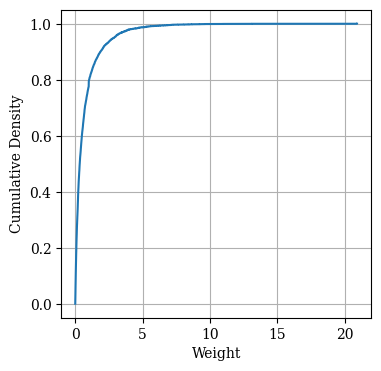

In [3]:
plot_cumulative_density(pd.read_csv('resources/grn_models/scglue.csv').weight)

# Format resourcs used

In [14]:
if False: # HVGs: extract resources local jobs
    job_ids_dict_hvg = {
        'portia': 7744548,
        'grnboost2': 7742249,
        'scenic': 7742283,
        'genie3': 7742285,
        'ppcor': 7742364,
        'scglue': 7742343,
    }
        
    df_resources = process_trace_local(job_ids_dict_hvg)
    df_resources


,JobID,JobName,AllocCPUS,Elapsed,State,MaxRSS,MaxVMSize
portia,7744548.bat+,batch,20,0.153611,COMPLETED,5.854904,6.284901
grnboost2,7742249.bat+,batch,20,1.568056,COMPLETED,3.067471,3.563801
scenic,7742283.bat+,batch,20,1.908056,COMPLETED,30.356461,32.573463
genie3,7742285.bat+,batch,20,16.682500,COMPLETED,13.105103,13.563530
ppcor,7742364.bat+,batch,20,0.556667,COMPLETED,3.909119,4.283978
scglue,7742343.bat+,batch,20,4.380278,FAILED,29.917423,35.933720


## Merge scores with resources

In [20]:
df_res = pd.read_csv('resources/results/trace/trace_hvg.csv', index_col=0)
df_scores = pd.read_csv('resources/results/scores/d0_hvg/scgen_pearson-ridge.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'resources/results/scores/d0_hvg/scgen_pearson-ridge.csv'

In [14]:
# create ranking 
df_scores = df_scores.fillna(0)
df_scores[df_scores < 0] = 0
df_scores = (df_scores-df_scores.min(axis=0))/(df_scores.max(axis=0)-df_scores.min(axis=0))
df_scores['overall_score'] = df_scores.mean(axis=1)
# df_scores['rank'] = df_scores.mean(axis=1).rank(ascending=False).astype(int)

df_all = pd.concat([df_scores, df_res], axis=1)
df_all = df_all.fillna(0)
df_all.index.name = 'method_name' 
df_all = df_all.reset_index()

df_all 


,method_name,S1,S2,static-theta-0.0,static-theta-0.5,overall_score,Peak memory (GB),Duration (hour)
0,collectri,0.000000,0.000000,0.500809,0.086811,0.146905,0.000000,0.000000
1,negative_control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,positive_control,0.517356,1.000000,0.571681,0.763590,0.713157,4.900000,0.075278
3,pearson_corr,0.706973,0.879884,0.946418,0.354523,0.721949,0.975100,0.072500
4,portia,0.390888,0.392604,0.435863,0.117372,0.334182,5.854904,0.153611
5,ppcor,0.059957,0.162584,0.342733,0.038118,0.150848,3.909119,0.556667
6,genie3,0.977976,0.847163,0.952597,0.684918,0.865663,13.105103,16.682500
7,grnboost2,1.000000,0.794475,1.000000,1.000000,0.948619,3.067471,1.568056
8,scenic,0.387244,0.370915,0.691114,0.662750,0.528006,30.356461,1.908056
9,scglue,0.205518,0.412663,0.431359,0.204913,0.313613,29.917423,4.380278


## Summary figure

In [40]:

summary_file = "output/summary_d0_hvg.tsv"
summary_figure = "output/summary_d0_hvg_figure.pdf"

df_all['memory_log'] = np.log(df_all['Peak memory (GB)']+1)
df_all['memory_log'] = np.max(df_all['memory_log'])-df_all['memory_log']


df_all["duration_log"] = np.log(df_all['Duration (hour)']+1)
df_all['duration_log'] = np.max(df_all['duration_log'])-df_all['duration_log']

df_all["duration_str"] = df_all['Duration (hour)'].round(1).astype(str)
df_all['memory_str'] =  df_all['Peak memory (GB)'].round(1).astype(str)


df_all.to_csv(summary_file, sep='\t')

!Rscript ../grn_benchmark/src/metrics_figure.R {summary_file} {summary_figure}


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.5.1     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
`thisfile()` was deprecated in rprojroot 2.0.0.
ℹ Please use `whereami::thisfile()` instead. 
New names:
• `` -> `...1`
Rows: 12 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): method_name
dbl (12): ...1, S1, S2, static-theta-0.0, static-theta-0.5, overall_score, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10 × 7
   id               id_color         name       group geom  palette options     
   <c

# All layers

In [60]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [17]:
base_dir = 'resources/scores/d0_hvg'
layers = ['lognorm','pearson', 'seurat_lognorm', 'seurat_pearson', 'scgen_lognorm', 'scgen_pearson']
reg_type = 'ridge'
reg1_metric = 'S1'
reg2_metric = 'static-theta-0.5'
for i, layer in enumerate(layers):
    df = pd.read_csv(f'{base_dir}/{layer}-{reg_type}.csv',index_col=0)
    df_reg1 = df.loc[:, [reg1_metric]].rename(columns={reg1_metric:layer})
    df_reg2 = df.loc[:, [reg2_metric]].rename(columns={reg2_metric:layer})
    
    if i == 0:
        reg1_scores_layers = df_reg1
        reg2_scores_layers = df_reg2
    else:
        reg1_scores_layers = pd.concat([reg1_scores_layers, df_reg1], axis=1)
        reg2_scores_layers = pd.concat([reg2_scores_layers, df_reg2], axis=1)
    
reg1_scores_layers = reg1_scores_layers.T
reg2_scores_layers = reg2_scores_layers.T

reg1_scores_layers.to_csv('../grn_benchmark/results_folder/scores/reg1_scores_layers_hvgs.csv')
reg2_scores_layers.to_csv('../grn_benchmark/results_folder/scores/reg2_scores_layers_hvgs.csv')

reg1_scores_layers.style.background_gradient()


,collectri,negative_control,positive_control,pearson_corr,portia,ppcor,genie3,grnboost2,scenic,scglue,celloracle
lognorm,-0.050548,-0.042234,0.082101,0.046997,0.014856,0.003078,0.073206,0.091619,0.068810,0.027315,0.068165
pearson,-0.095474,-0.041130,0.163470,0.217511,0.113185,0.016686,0.295920,0.299160,0.117241,0.061848,0.171422
seurat_lognorm,-0.052159,-0.041432,0.087152,0.053505,0.017466,0.003723,0.081703,0.105108,0.079217,0.031597,0.078648
seurat_pearson,-0.095343,-0.041747,0.174773,0.219817,0.108111,0.016615,0.293678,0.301832,0.122765,0.064890,0.181489
scgen_lognorm,-0.059849,-0.041816,0.160466,0.094411,0.055487,0.008795,0.162319,0.219727,0.147812,0.060572,0.150424
scgen_pearson,-0.100238,-0.039305,0.197129,0.269379,0.148941,0.022846,0.372641,0.381032,0.147553,0.078309,0.216897


In [21]:
base_dir = 'resources/scores/'
layers = ['lognorm','pearson', 'seurat_lognorm', 'seurat_pearson', 'scgen_lognorm', 'scgen_pearson']
reg_type = 'ridge'
reg1_metric = 'S1'
reg2_metric = 'static-theta-0.5'
for i, layer in enumerate(layers):
    df = pd.read_csv(f'{base_dir}/{layer}-{reg_type}.csv',index_col=0)
    df_reg1 = df.loc[:, [reg1_metric]].rename(columns={reg1_metric:layer})
    df_reg2 = df.loc[:, [reg2_metric]].rename(columns={reg2_metric:layer})
    
    if i == 0:
        reg1_scores_layers = df_reg1
        reg2_scores_layers = df_reg2
    else:
        reg1_scores_layers = pd.concat([reg1_scores_layers, df_reg1], axis=1)
        reg2_scores_layers = pd.concat([reg2_scores_layers, df_reg2], axis=1)
    
reg1_scores_layers = reg1_scores_layers.T
reg2_scores_layers = reg2_scores_layers.T

reg1_scores_layers.to_csv('../grn_benchmark/results_folder/scores/reg1_scores_layers.csv')
reg2_scores_layers.to_csv('../grn_benchmark/results_folder/scores/reg2_scores_layers.csv')

reg1_scores_layers.style.background_gradient()


,collectri,negative_control,positive_control,pearson_corr,portia,ppcor,grnboost2,scenic,granie,scglue,celloracle
lognorm,-0.050548,-0.043757,0.082101,0.062031,0.010746,0.001611,0.118505,0.075060,0.044887,0.035910,0.069066
pearson,-0.095474,-0.043600,0.163470,0.222177,0.082329,0.014658,0.332626,0.130075,0.070551,0.079671,0.167634
seurat_lognorm,-0.052159,-0.044382,0.087152,0.068895,0.011506,0.002132,0.135575,0.080760,0.049640,0.039661,0.080605
seurat_pearson,-0.095343,-0.042833,0.174773,0.226611,0.087287,0.016914,0.339841,0.136727,0.075773,0.079768,0.174873
scgen_lognorm,-0.059849,-0.044936,0.160466,0.117994,0.029785,0.005762,0.263282,0.152383,0.090862,0.071800,0.153270
scgen_pearson,-0.100238,-0.044574,0.197129,0.273443,0.101110,0.017954,0.421936,0.172085,0.083298,0.099859,0.209151


# Robustness analysis

In [54]:
# !python src/robustness_analysis/script_all.py
if True:
    !sbatch scripts/sbatch/robustness_analysis.sh

Submitted batch job 7752429


## Permute

In [2]:
# net 
noise_type = 'net'
base_dir = 'resources/results/robustness_analysis'
degrees = [0, 10, 20, 50, 100]
reg1_metric = 'S1'
reg2_metric = 'static-theta-0.5'
for i, degree in enumerate(degrees):
    df = pd.read_csv(f'{base_dir}/{noise_type}-{degree}-scores.csv',index_col=0)
    df_reg1 = df.loc[:, [reg1_metric]].rename(columns={reg1_metric:degree})
    df_reg2 = df.loc[:, [reg2_metric]].rename(columns={reg2_metric:degree})
    
    if i == 0:
        reg1_scores_layers = df_reg1
        reg2_scores_layers = df_reg2
    else:
        reg1_scores_layers = pd.concat([reg1_scores_layers, df_reg1], axis=1)
        reg2_scores_layers = pd.concat([reg2_scores_layers, df_reg2], axis=1)
    
reg1_scores_layers = reg1_scores_layers.T
reg2_scores_layers = reg2_scores_layers.T
reg1_scores_layers.style.background_gradient()


FileNotFoundError: [Errno 2] No such file or directory: 'resources/results/robustness_analysis/net-0-scores.csv'

In [48]:
reg2_scores_layers.style.background_gradient()

,collectri,negative_control,positive_control,pearson_corr,pearson_causal,portia,ppcor,genie3,grnboost2,scenic,scglue,celloracle
0,0.514896,0.505002,0.574608,0.524232,0.560490,0.518048,0.509874,0.576580,0.609075,0.574294,0.527076,0.580147
10,0.515406,0.505691,0.571882,0.523067,0.555572,0.524393,0.516036,0.570821,0.601759,0.565942,0.530801,0.573236
20,0.511172,0.504663,0.555954,0.526195,0.552449,0.515956,0.515292,0.569976,0.596415,0.561619,0.526821,0.563653
50,0.511803,0.495854,0.552935,0.524744,0.534764,0.516056,0.510711,0.556661,0.581920,0.548328,0.518366,0.542993
100,0.505540,0.503372,0.531005,0.513729,0.523002,0.506760,0.513287,0.504832,0.514585,0.504093,0.506443,0.513158


In [3]:
noise_type = 'sign'
base_dir = 'resources/results/robustness_analysis'
degrees = [0, 10, 20, 50, 100]
reg1_metric = 'S1'
reg2_metric = 'static-theta-0.5'
for i, degree in enumerate(degrees):
    df = pd.read_csv(f'{base_dir}/{noise_type}-{degree}-scores.csv',index_col=0)
    df_reg1 = df.loc[:, [reg1_metric]].rename(columns={reg1_metric:degree})
    df_reg2 = df.loc[:, [reg2_metric]].rename(columns={reg2_metric:degree})
    
    if i == 0:
        reg1_scores_layers = df_reg1
        reg2_scores_layers = df_reg2
    else:
        reg1_scores_layers = pd.concat([reg1_scores_layers, df_reg1], axis=1)
        reg2_scores_layers = pd.concat([reg2_scores_layers, df_reg2], axis=1)
    
reg1_scores_layers = reg1_scores_layers.T
reg2_scores_layers = reg2_scores_layers.T
reg1_scores_layers.style.background_gradient()

,collectri,negative_control,positive_control,pearson_corr,pearson_causal,portia,ppcor,genie3,grnboost2,scenic,scglue,celloracle
0,-0.100238,-0.043795,0.489147,0.238664,0.355256,0.148941,0.022846,0.372641,0.381032,0.147553,0.078309,0.216897
10,-0.107958,-0.042199,0.433246,0.170612,0.297354,0.103448,0.018551,0.309243,0.320476,0.105850,0.051565,0.148519
20,-0.129616,-0.042258,0.383169,0.109502,0.259201,0.064159,-0.001810,0.203046,0.229562,0.067477,0.026945,0.080443
50,-0.154785,-0.040425,-0.091824,-0.000377,-0.188567,-0.090789,-0.013036,-0.114169,-0.122291,-0.025912,-0.010141,-0.135087
100,-0.100238,-0.043795,0.489147,0.238664,0.355256,0.148941,0.022846,0.372641,0.381032,0.147553,0.078309,0.216897


In [4]:
reg2_scores_layers.style.background_gradient()

,collectri,negative_control,positive_control,pearson_corr,pearson_causal,portia,ppcor,genie3,grnboost2,scenic,scglue,celloracle
0,0.514896,0.505002,0.574608,0.524232,0.560490,0.518048,0.509874,0.576580,0.609075,0.574294,0.527076,0.580147
10,0.514113,0.504708,0.574608,0.524232,0.560490,0.518048,0.509874,0.576580,0.609075,0.574294,0.527076,0.580147
20,0.513857,0.505899,0.574608,0.524232,0.560490,0.518048,0.509874,0.576580,0.609075,0.574294,0.527076,0.580147
50,0.512082,0.506397,0.574608,0.524232,0.560490,0.518048,0.509874,0.576580,0.609075,0.574294,0.527076,0.580147
100,0.508349,0.508202,0.574608,0.524232,0.560490,0.518048,0.509874,0.576580,0.609075,0.574294,0.527076,0.580147


# repo

In [ ]:
# if par['metacell']:
#     print('metacell')
#     def create_meta_cells(df, n_cells=15):
#         meta_x = []
#         for i in range(0, df.shape[0], n_cells):
#             meta_x.append(df.iloc[i:i+n_cells, :].sum(axis=0).values)
#         df = pd.DataFrame(meta_x, columns=df.columns)
#         return df
            
#     adata_df = pd.DataFrame(multiomics_rna.X.todense(), columns=multiomics_rna.var_names)
#     adata_df['cell_type'] = multiomics_rna.obs['cell_type'].values
#     adata_df['donor_id'] = multiomics_rna.obs['donor_id'].values
#     df = adata_df.groupby(['cell_type','donor_id']).apply(lambda df: create_meta_cells(df))
#     X = df.values
#     var = pd.DataFrame(index=df.columns)
#     obs = df.reset_index()[['cell_type','donor_id']]
#     multiomics_rna = ad.AnnData(X=X, obs=obs, var=var)